# Solución a objetos estelares compactos autogravitantes con distribución anisótropa 

In [1]:
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import astropy.constants as ast

In [2]:
M = 1.989e30 #masa total
#M = 1.989e5
R = 696340e3 #Radio
P = 2.65e16 #Presión central
D = 150e3 #Densidad central
c = ast.c.value
G = ast.G.value


In [3]:
#Son básicamente las magnitudes tildadas:

r_ = sym.Symbol('ŕ') #Radio normalizado
p_ = sym.Symbol('ṕ') #Presión radial normalizada
pt_ = sym.Symbol('ṕt') #Presión tangencial normalizada 
d_ = sym.Symbol('ð') #Densidad normalizada
m_ = sym.Symbol('ḿ') #Masa normalizada

#Ecuaciones adimensionales auxiliares
u = M*G/(R*(c)**2)
k = P/(D*(c)**2)
n = (D/(M/((4/3)*np.pi*(R**3))))


**NOTA**: los símbolos aparecen como r,p,dt,d y m, pero hacen referencia a tales magnitudes normalizadas, en caso de hallar el r sin normalizar basta con multiplicar con R

## Ecuaciones estructurales estelares

In [4]:
#Ecuación estructural newtoniana
def dPdr_N(m,d,aniso):
    return  -(u/k)*(m*d/(r_**2)) + 2*aniso/r_ 

#Ecuación estructural de Einstein
def dPdr_E(m,d,aniso):
        return ((-u/k)*(m*d/(r_**2)))*(1+k*(p_/d))*(1+3*n*k*((p_*r_**3)/m))*(1-2*u*(m/r_))**-1 + 2*aniso/r_

In [5]:
def density():
    B = (5/3)*(1-3/n) 
    return (1-B*r_**2) #Perfil de densidades tipo Gokhroo-Mehra

def mass():
    f = ((n*r_**2)*density())
    return sym.integrate(f,(r_))

In [6]:
density()

1 - 1.6197895501591*ŕ**2

Text(0.5, 0, 'Distancia radial normalizada')

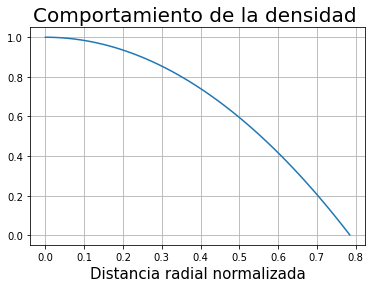

In [7]:
den = sym.lambdify(r_,density())
x=np.linspace(0,0.785,100)
plt.plot(x, den(x))
plt.grid()
plt.title('Comportamiento de la densidad ', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)

In [8]:
mass()

-34.553950217856*ŕ**5 + 35.553950217856*ŕ**3

Text(0, 0.5, 'Masa adimensional')

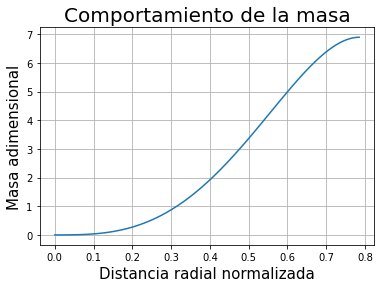

In [9]:
m = sym.lambdify(r_,mass())
x=np.linspace(0,0.785,100)
plt.grid()
plt.plot(x, m(x))
plt.title('Comportamiento de la masa', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)
plt.ylabel('Masa adimensional', fontsize=15)

## Ecuaciones de anisotropía

In [10]:
def newt(C,m):
    return (C*m*density())/r_ #Anisotropía para el encuadre Newton

def HIM(C):
    return C*(p_/r_) #Anisotropía de Horvat-Ilijic-Marunovic
    
    

<lambdifygenerated-25>:2: RuntimeWarning: invalid value encountered in divide
  return ((1 - 1.6197895501591*ŕ**2)*(-34553950.217856*ŕ**5 + 35553950.217856*ŕ**3)/ŕ)


Text(0.5, 0, 'Distancia radial normalizada')

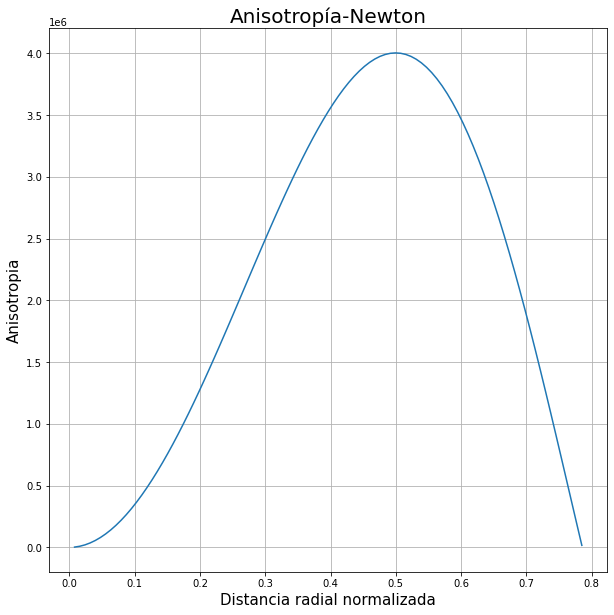

In [34]:
s = newt(1e6,mass())
s = sym.lambdify(r_,s)
rad = np.linspace(0,0.785,100)
plt.figure(figsize=(10,10))
plt.plot(rad, s(rad))
plt.grid()
plt.title('Anisotropía-Newton',fontsize=20)
plt.ylabel('Anisotropia', fontsize=15)
plt.xlabel('Distancia radial normalizada', fontsize=15)


## Solucion numérica a las ecuaciones estructurales

### Aproximación Newton

In [46]:
solve_ivp?

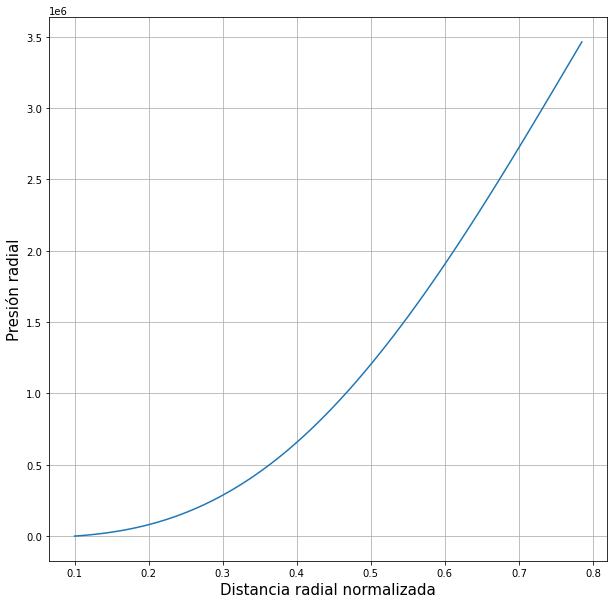

In [67]:
g = sym.integrate(dPdr_N(mass(),density(),newt(1e6,mass())),r_)
pr = sym.lambdify(r_,g)
r = np.linspace(0,0.785,100)
'''plt.figure(figsize=(10,10))
plt.grid()
plt.plot(r,pr(r))
plt.title('Presión radial', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)
plt.ylabel('Presión radial adimensional')'''


plt.figure(figsize=(10,10))
def eq(r,p):
    return pr(r)
l = solve_ivp(eq, [0.1,0.785], [1.0], t_eval = np.linspace(0.1,0.785,100))
plt.plot(l.t,l.y[0])
plt.ylabel('Presión radial', fontsize=15)
plt.xlabel('Distancia radial normalizada',fontsize=15)
plt.grid()

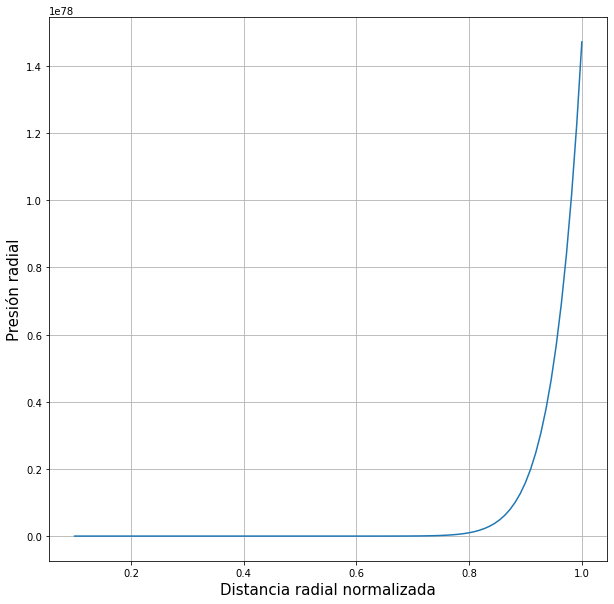

In [43]:
f = dPdr_N(mass(),density(),HIM(10))
fun = sym.lambdify((r_,p_),f) 

def dif(r,p):
    return fun(r,p)

t_eval = np.linspace(0.1,1, 100)


sol = solve_ivp(dif, [t_eval[0], t_eval[-1]], [1.0], t_eval=t_eval)
plt.figure(figsize=(10,10))
plt.plot(sol.t, sol.y[0])
plt.ylabel('Presión radial', fontsize=15)
plt.xlabel('Distancia radial normalizada',fontsize=15)
plt.grid()

### Aproximación Einstein

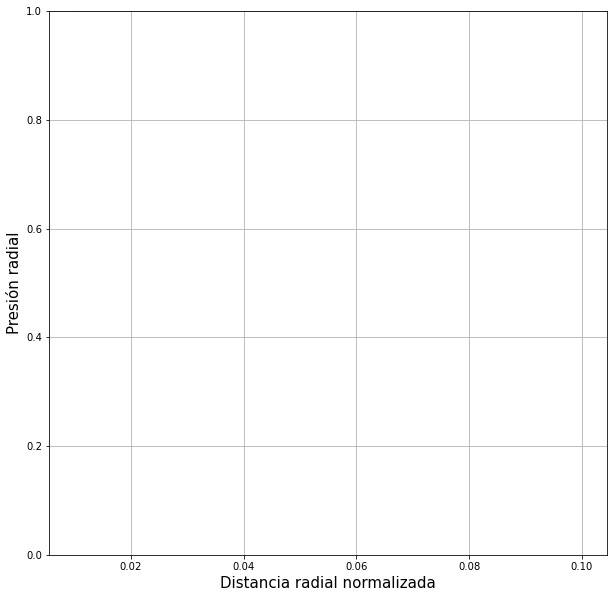

In [68]:
f = dPdr_E(mass(),density(),HIM(100))
fun = sym.lambdify((r_,p_),f) 

def dif(r,p):
    return fun(r,p)

t_eval = np.linspace(0.01,0.1, 100)


sol = solve_ivp(dif, [t_eval[0], t_eval[-1]], [1.0], t_eval=t_eval)
plt.figure(figsize=(10,10))
plt.plot(sol.t, sol.y[0])
plt.ylabel('Presión radial', fontsize=15)
plt.xlabel('Distancia radial normalizada',fontsize=15)
plt.ylim(0,1)
plt.grid()